In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (10,8)
plt.style.use('ggplot')
%matplotlib inline

In [2]:
rating = pd.read_csv("rating.csv")
anime = pd.read_csv("anime.csv")

In [3]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [4]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
rating.dtypes

user_id     int64
anime_id    int64
rating      int64
dtype: object

In [6]:
anime.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

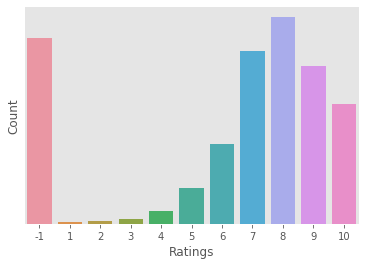

In [7]:
# Checking the most common rating to get a general idea
ax = sns.barplot(rating.groupby("rating").count()["user_id"].index , rating.groupby("rating").count()["user_id"])
ax.set(xlabel='Ratings', ylabel='Count')
plt.yticks([])
plt.savefig("ratings_cnt.png" , bbox_inches='tight')
plt.show()

In [8]:
rating = rating.merge(anime[["anime_id","rating"]] , on=["anime_id"])
rating.head()

,user_id,anime_id,rating_x,rating_y
0,1,20,-1,7.81
1,3,20,8,7.81
2,5,20,6,7.81
3,6,20,-1,7.81
4,10,20,-1,7.81


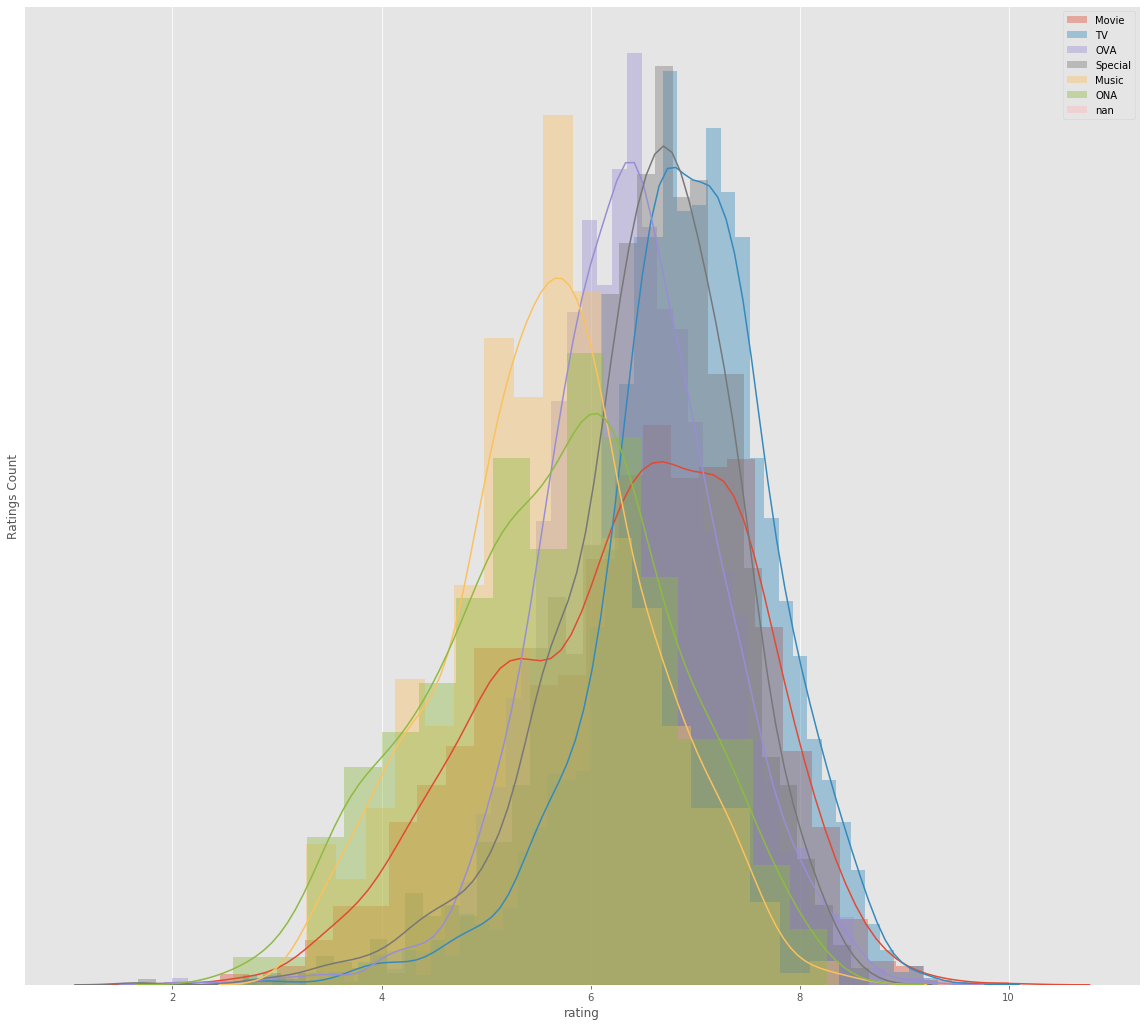

In [9]:
# Checking rating by genre
import warnings
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(20,18))

for t in anime["type"].unique():
    sns.distplot(anime[anime["type"] == t]["rating"] , label=t)

plt.legend()
plt.yticks([])
plt.ylabel("Ratings Count")
plt.savefig("genre_var.png" , bbox_inches='tight')
plt.show()

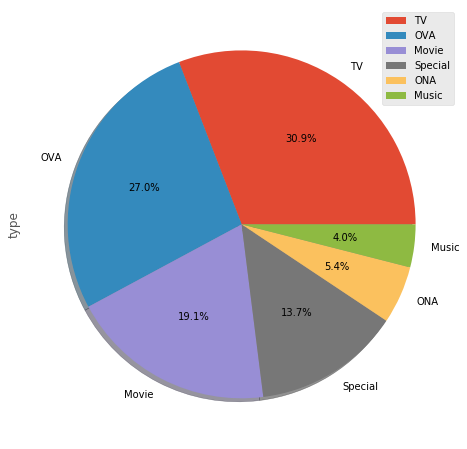

In [10]:
# Types of anime 
warnings.filterwarnings("default")
anime['type'].value_counts().plot.pie(autopct='%.1f%%',labels=anime['type'].value_counts().index.tolist(),shadow=True,figsize=(8,8))
plt.legend()
plt.savefig("comp.png" , bbox_inches='tight')
plt.show()

In [11]:
# Every user rates differently , so calculating mean per user to find out what he likes
mpr = rating.groupby(['user_id'])["rating_x"].mean().reset_index()
mpr["mpr"] = mpr["rating_x"]
mpr.drop(["rating_x"] , axis=1 , inplace=True)
mpr.head()

,user_id,mpr
0,1,-0.712418
1,2,2.666667
2,3,7.382979
3,4,-1.000000
4,5,4.263383


In [12]:
rating.merge(mpr , on=["user_id"])

,user_id,anime_id,rating_x,rating_y,mpr
0,1,20,-1,7.81,-0.712418
1,1,24,-1,8.06,-0.712418
2,1,79,-1,7.31,-0.712418
3,1,226,-1,7.85,-0.712418
4,1,241,-1,6.69,-0.712418
...,...,...,...,...,...
7813722,68269,5663,7,5.26,7.000000
7813723,38113,10429,7,6.22,7.000000
7813724,48800,5990,-1,5.98,-1.000000
7813725,42294,8152,-1,6.30,-1.000000


In [13]:
rating[rating["user_id"] == 1]["rating_x"].unique()

array([-1, 10], dtype=int64)

In [14]:
# reducing size due to memory limitations
LAST_ID = 10000

rating = rating[rating["user_id"] <= LAST_ID]

In [15]:
ua = pd.crosstab(rating["user_id"] , rating["anime_id"])

In [16]:
ua.head(10)

anime_id,1,5,6,7,8,15,16,17,18,19,...,34048,34085,34103,34107,34136,34173,34240,34283,34324,34325
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Now lets cluster the anime using pca & thus reducing the dim of data
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(ua)
ua_red = pd.DataFrame(pca.transform(ua))
ua_red.head()

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,0,1,2
0,2.620578,-3.341260,3.331323
1,-2.647420,-0.488523,0.466440
2,0.136618,-1.846883,-2.028651
3,-0.811245,-0.515464,0.307008
4,9.149200,-2.741303,2.397240


D:\Programs\Anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


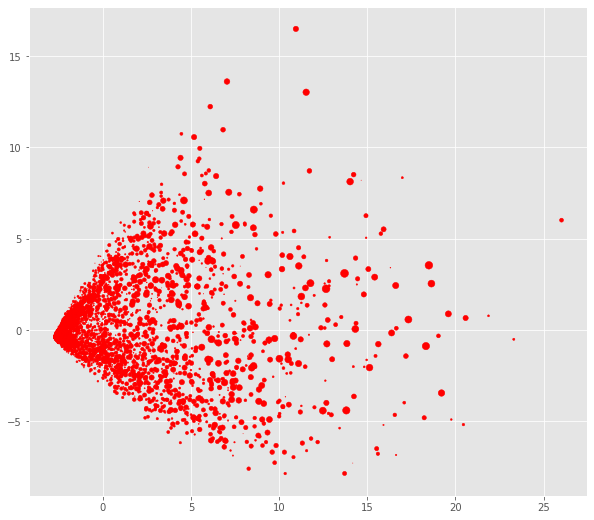

In [18]:
fig = plt.figure(figsize=(10,9))
plt.scatter(ua_red[0] , ua_red[1] , s=(ua_red[2]-ua_red[2].mean())*10/ua_red[2].std() , c="r")
plt.savefig("ua_red_scatter.png" , bbox_inches='tight')
plt.show()

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(ua_red)
    inertia[i] = kmeans.inertia_
    scores.append(silhouette_score(ua_red, kmeans.labels_))

D:\Programs\Anaconda\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


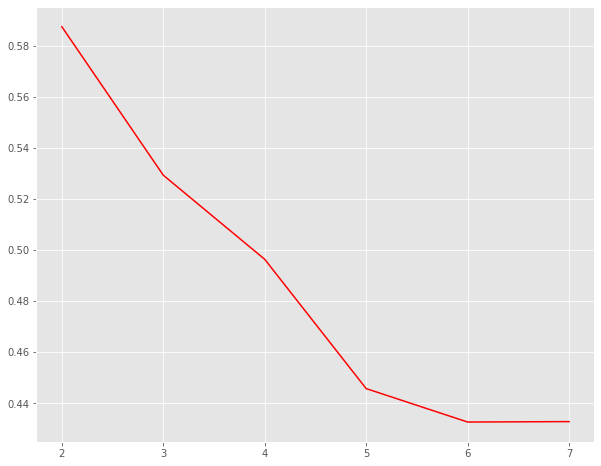

In [20]:
fig = plt.figure(figsize=(10,8))
plt.plot(list(range(2,8)) , scores , c="r")
plt.savefig("scores.png")
plt.show()

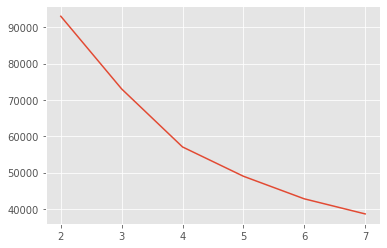

In [21]:
plt.plot(np.arange(2,8) , inertia[2:])
plt.savefig("inertia.png")
plt.show()

In [22]:
clusterer = KMeans(n_clusters=4,random_state=30).fit(ua_red)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(ua_red)
print(centers)

[[-1.72063291 -0.04267164  0.09548682]
 [ 2.35266136  3.5972935   0.0462852 ]
 [ 9.97607708 -1.27117333  0.90160842]
 [ 2.2683551  -1.72683338 -0.63342864]]


D:\Programs\Anaconda\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


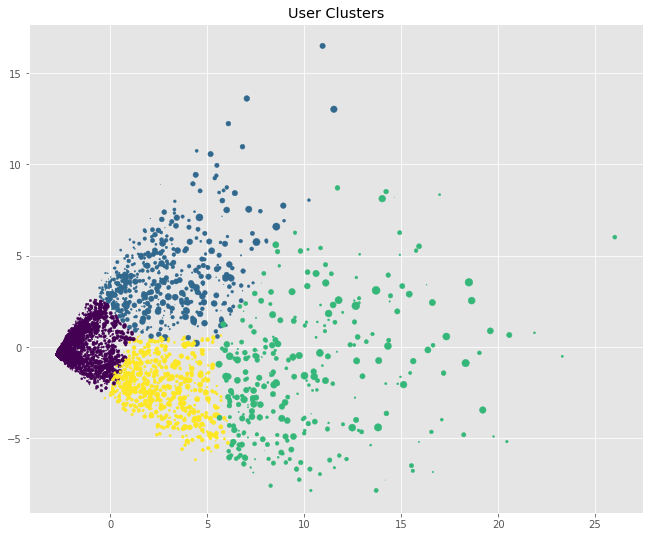

In [23]:
fig = plt.figure(figsize=(11,9))
plt.scatter(ua_red[0] , ua_red[1] , s=(ua_red[2]-ua_red[2].mean())*10/ua_red[2].std() , c=c_preds)
plt.title("User Clusters")
plt.savefig("clusters.png" , bbox_inches='tight')
plt.show()

In [24]:
ua["cluster"] = c_preds

In [25]:
# Analysing the clusters
c0 = ua[ua['cluster']==0].drop('cluster',axis=1).mean()
c1 = ua[ua['cluster']==1].drop('cluster',axis=1).mean()
c2 = ua[ua['cluster']==2].drop('cluster',axis=1).mean()
c3 = ua[ua['cluster']==3].drop('cluster',axis=1).mean()

In [26]:
# Top animes by cluster
anime[anime["anime_id"].isin(c0.sort_values(ascending=False).index[0:10])]

,anime_id,name,genre,type,episodes,rating,members
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
164,853,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV,26,8.39,422271
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
841,20,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [27]:
anime[anime["anime_id"].isin(c1.sort_values(ascending=False).index[0:10])]

,anime_id,name,genre,type,episodes,rating,members
13,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888
15,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1,8.93,466254
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
200,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384
211,30,Neon Genesis Evangelion,"Action, Dementia, Drama, Mecha, Psychological,...",TV,26,8.32,461946
466,849,Suzumiya Haruhi no Yuuutsu,"Comedy, Mystery, Parody, School, Sci-Fi, Slice...",TV,14,8.06,428569
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13,7.85,623511
829,71,Full Metal Panic!,"Action, Comedy, Mecha, Military, Sci-Fi",TV,24,7.81,256325


In [28]:
anime[anime["anime_id"].isin(c2.sort_values(ascending=False).index[0:10])]

,anime_id,name,genre,type,episodes,rating,members
19,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151
118,19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
401,14813,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,13,8.12,353876
491,15809,Hataraku Maou-sama!,"Comedy, Demons, Fantasy, Romance, Shounen",TV,13,8.03,409037
583,14741,Chuunibyou demo Koi ga Shitai!,"Comedy, Drama, Romance, School, Slice of Life",TV,12,7.95,394399
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100
1349,10719,Boku wa Tomodachi ga Sukunai,"Comedy, Ecchi, Harem, Romance, School, Seinen,...",TV,12,7.57,325664
1709,8074,Highschool of the Dead,"Action, Ecchi, Horror, Supernatural",TV,12,7.46,535892


In [29]:
anime[anime["anime_id"].isin(c3.sort_values(ascending=False).index[0:10])]

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229
118,19815,No Game No Life,"Adventure, Comedy, Ecchi, Fantasy, Game, Super...",TV,12,8.47,602291
131,4224,Toradora!,"Comedy, Romance, School, Slice of Life",TV,25,8.45,633817
159,6547,Angel Beats!,"Action, Comedy, Drama, School, Supernatural",TV,13,8.39,717796
339,20507,Noragami,"Action, Adventure, Shounen, Supernatural",TV,12,8.17,515378
445,10620,Mirai Nikki (TV),"Action, Mystery, Psychological, Shounen, Super...",TV,26,8.07,657190
449,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12,8.07,618056
643,9919,Ao no Exorcist,"Action, Demons, Fantasy, Shounen, Supernatural",TV,25,7.92,583823
804,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100


In [30]:
TOP = 12
cluster_list = [c0,c1,c2,c3]
cnts = []
for i in range(4):
    cnt_d = {}
    c_fav = anime[anime["anime_id"].isin(cluster_list[i].sort_values(ascending=False).index[0:TOP])]
    for gen in c_fav["genre"]:
        gen_l = gen.split(",")
        for g in gen_l:
            try:
                cnt_d[g] += 1
            except:
                cnt_d[g] = 1
    cnts.append(cnt_d)

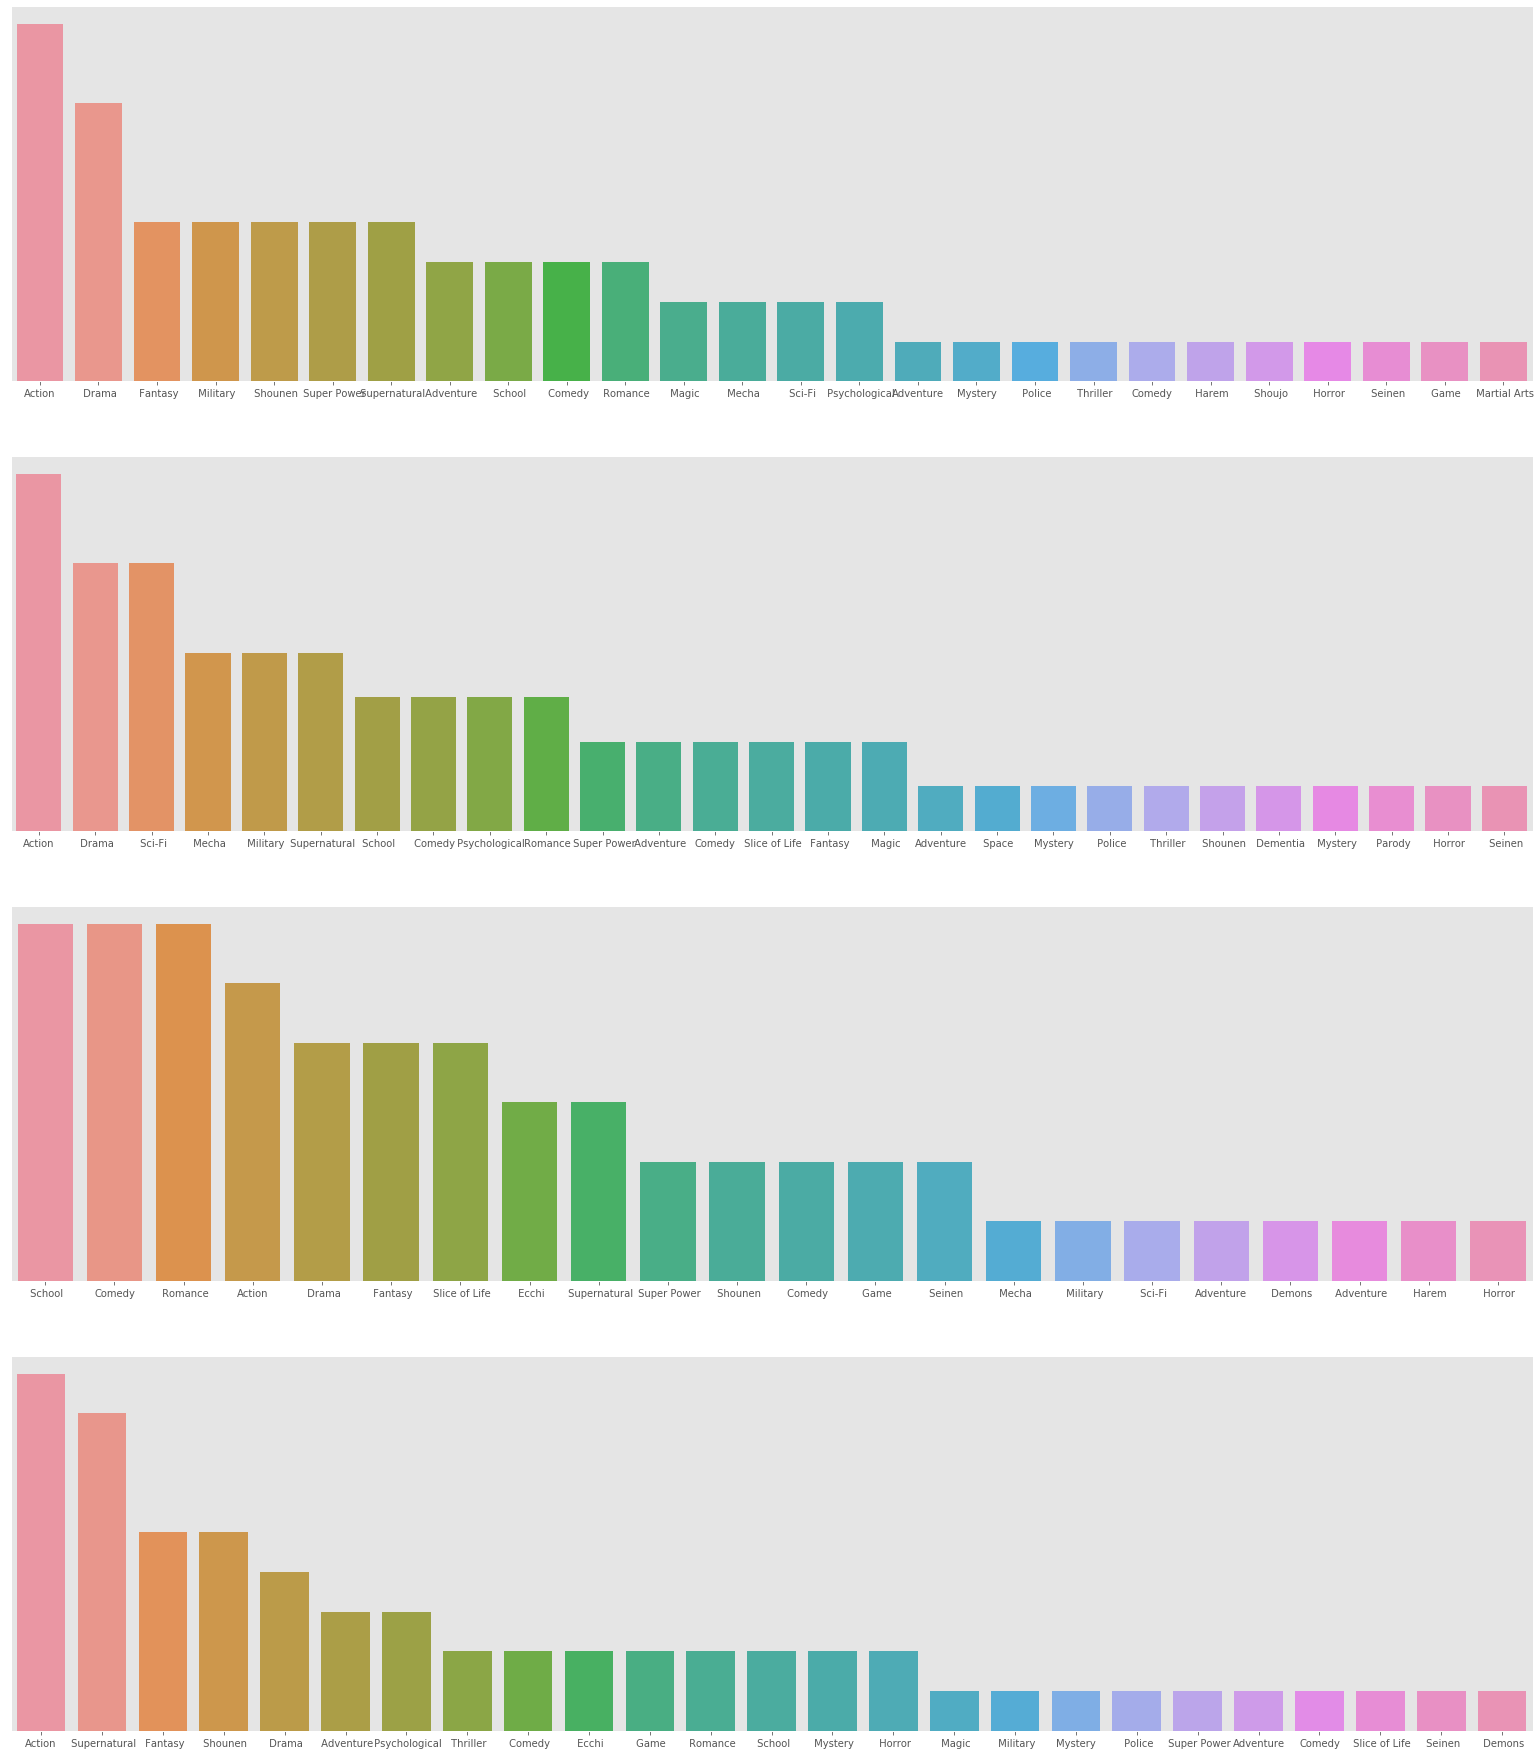

In [31]:
# Top anime genre by cluster!
fig = plt.figure(figsize=(60,40))

for i in range(4):
    ax = plt.subplot2grid((5,2) , (i+1,0))
    c_cnt = {k: v for k, v in sorted(cnts[i].items(), key=lambda item: item[1] , reverse=True)}
    sns.barplot(list(c_cnt.keys()) , list(c_cnt.values()) , ax=ax)
    ax.set_yticks([])

plt.savefig("cluster_best.png" , bbox_inches='tight')
plt.show()

In [32]:
rating.head()

,user_id,anime_id,rating_x,rating_y
0,1,20,-1,7.81
1,3,20,8,7.81
2,5,20,6,7.81
3,6,20,-1,7.81
4,10,20,-1,7.81


In [33]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [34]:
piv = rating.pivot_table(index=["user_id"] , columns=["anime_id"] , values=["rating_x"])
piv.head()

rating_x                                                        ...  \
anime_id    1     5     6     7     8     15    16    17    18    19     ...   
user_id                                                                  ...   
1             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
2             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
3             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
4             NaN   NaN  -1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
5             NaN   NaN   8.0   NaN   NaN   6.0   NaN   6.0   6.0   NaN  ...   

                                                                      
anime_id 34048 34085 34103 34107 34136 34173 34240 34283 34324 34325  
user_id                                                               
1          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
5          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 8337 columns]

In [35]:
piv.shape

(10000, 8337)

In [36]:
# Normalize the values
piv_norm = piv.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)

# Drop all columns containing only zeros representing users who did not rate
piv_norm.fillna(0, inplace=True)
piv_norm = piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis=0)]

In [37]:
# Converting in sparse matrix
import scipy as sp

piv_sparse = sp.sparse.csr_matrix(piv_norm.values)

In [38]:
from sklearn.metrics.pairwise import cosine_similarity

item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)

In [39]:
# Inserting the similarity matricies into dataframe objects

item_sim_df = pd.DataFrame(item_similarity, index = piv_norm.index, columns = piv_norm.index)
user_sim_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)

In [40]:
import operator

# This function will return the top 10 shows with the highest cosine similarity value
def top_animes(anime_name):
    anime_id = (anime[anime["name"] == anime_name]["anime_id"].values)[0]
    count = 1
    print('Similar shows to {} include:\n'.format(anime_name))
    for item in item_sim_df.sort_values(by = [("rating_x" , anime_id)], ascending = False).index[1:11]:
        print('No. {}: {}'.format(count, (anime[anime["anime_id"] == item[1]]["name"].values)[0]))
        count +=1  
        
# This function will return the top 5 users with the highest similarity value 
def top_users(user):
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    print('Most Similar Users:\n')
    sim_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:11]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    zipped = zip(sim_users, sim_values,)
    for user, sim in zipped:
        print('User #{0}, Similarity value: {1:.2f}'.format(user, sim)) 
        
# This function constructs a list of lists containing the highest rated shows per similar user
# and returns the name of the show along with the frequency it appears in the list
def similar_user_recs(user , return_name=True):
    
    if user not in piv_norm.columns:
        return('No data available on user {}'.format(user))
    
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:11]
    best = []
    most_common = {}
    
    for i in sim_users:
        max_score = piv_norm.loc[:, i].max()
        best.append(piv_norm[piv_norm.loc[:, i]==max_score].index.tolist())
    for i in range(len(best)):
        for j in best[i]:
            if j in most_common:
                most_common[j] += 1
            else:
                most_common[j] = 1
    sorted_list = sorted(most_common.items(), key=operator.itemgetter(1), reverse=True)
    
    if return_name:
        f_list = []
        for ele in sorted_list:
            det , val = ele
            anime_name = (anime[anime["anime_id"] == det[1]]["name"].values)[0]
            f_list.append((anime_name , val))
    else:
        f_list = sorted_list
    return f_list[:5]

# This function calculates the weighted average of similar users
# to determine a potential rating for an input user and show
def predicted_rating(anime_name, user):
    anime_id = (anime[anime["name"] == anime_name]["anime_id"].values)[0]
    sim_users = user_sim_df.sort_values(by=user, ascending=False).index[1:1000]
    user_values = user_sim_df.sort_values(by=user, ascending=False).loc[:,user].tolist()[1:1000]
    rating_list = []
    weight_list = []
    for j, i in enumerate(sim_users):
        rating = piv.loc[i, ("rating_x" , anime_id)]
        similarity = user_values[j]
        if np.isnan(rating):
            continue
        elif not np.isnan(rating):
            rating_list.append(rating*similarity)
            weight_list.append(similarity)
    return sum(rating_list)/sum(weight_list)

In [41]:
USER = 19

In [42]:
top_animes('Samurai Champloo')

Similar shows to Samurai Champloo include:

No. 1: Cowboy Bebop
No. 2: Great Teacher Onizuka
No. 3: Tengen Toppa Gurren Lagann
No. 4: Mushishi
No. 5: Black Lagoon
No. 6: Rurouni Kenshin: Meiji Kenkaku Romantan - Tsuioku-hen
No. 7: Sen to Chihiro no Kamikakushi
No. 8: Black Lagoon: The Second Barrage
No. 9: Ghost in the Shell: Stand Alone Complex
No. 10: Toki wo Kakeru Shoujo


In [43]:
top_users(USER)

Most Similar Users:

User #6028, Similarity value: 0.67
User #4646, Similarity value: 0.57
User #8492, Similarity value: 0.56
User #2464, Similarity value: 0.53
User #2667, Similarity value: 0.53
User #1709, Similarity value: 0.53
User #5008, Similarity value: 0.52
User #2126, Similarity value: 0.50
User #5164, Similarity value: 0.50
User #1156, Similarity value: 0.50


In [44]:
similar_user_recs(USER)

[('Shingeki no Kyojin', 3),
 ('Sen to Chihiro no Kamikakushi', 2),
 ('Nana', 2),
 ('Cowboy Bebop', 1),
 ('Ookami Kodomo no Ame to Yuki', 1)]

In [45]:
predicted_rating('Samurai Champloo', USER)

7.965080989072538

In [46]:
# list of every show watched by user 9

watched = piv.T[piv.loc[USER,:]>0].index.tolist()

In [47]:
# list of the squared errors between actual and predicted value
import random

errors = []
for i in random.choices(watched , k=5):
    print(i)
    actual=piv.loc[USER, i]
    name = (anime[anime["anime_id"] == i[1]]["name"].values)[0]
    predicted = predicted_rating(name, USER)
    errors.append((actual-predicted)**2)

np.mean(errors)

('rating_x', 1575)
('rating_x', 1)
('rating_x', 14353)
('rating_x', 1535)
('rating_x', 11577)


0.5592091524501188

In [48]:
dat = pd.HDFStore("dat.h5")
dat["piv_norm"] = piv_norm
dat["item_sim_df"] = item_sim_df
dat["user_sim_df"] = user_sim_df